In [1]:
import pandas as pd
import datetime
import numpy as np
import yfinance as yf
from IPython.display import clear_output
import xlrd 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\juan\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [6]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_info = table[0]
df_info.to_csv('S&P500-Info.csv')
lista = df_info['Symbol'].tolist()
lista = [c.replace('.', '-') for c in lista]
lista

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL

In [112]:
df_list = list()
for ticker in lista:
    data = yf.download(ticker, start='2000-01-02', end= '2022-01-01', group_by="Ticker")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [17]:
sp500 = pd.read_parquet("df_parquet")

In [3]:
sp500.fillna(0,inplace=True)

In [4]:
sp500

,Open,High,Low,Close,Adj Close,Volume,ticker,Date,Day of Week
Date,,,,,,,,,
2000-01-03,48.031250,48.250000,47.031250,47.187500,26.434866,2173400.0,MMM,2000-01-03,Monday
2000-01-03,0.506938,0.536966,0.494574,0.536966,0.536966,990752.0,PENN,2000-01-03,Monday
2000-01-03,26.666668,26.750000,24.916668,26.666668,14.174252,3018300.0,PAYX,2000-01-03,Monday
2000-01-03,34.208332,34.208332,32.333332,32.541668,22.260296,593400.0,PH,2000-01-03,Monday
2000-01-03,8.641975,8.790123,8.345679,8.592593,4.107287,3280500.0,PCAR,2000-01-03,Monday
...,...,...,...,...,...,...,...,...,...
2021-12-31,42.430000,42.730000,41.849998,41.860001,40.710648,876600.0,VNO,2021-12-31,Friday
2021-12-31,107.089996,107.919998,106.680000,107.629997,106.514458,589800.0,CHRW,2021-12-31,Friday
2021-12-31,43.529999,43.820000,43.380001,43.549999,43.266838,2572800.0,FITB,2021-12-31,Friday


EJERCICIO 1:mejor día para invertir teniendo en cuenta el retorno de los movimiento gap

In [18]:
sp500['Date'] = sp500.index
sp500['Date'] = sp500['Date'].dt.date 
sp500['Date'] = pd.to_datetime(sp500['Date'], errors='coerce')
sp500['Day of Week'] = sp500['Date'].dt.day_name()

In [26]:
a=sp500.groupby("Day of Week")


KeyError: 'Day of Week'

In [28]:
a


,Open,High,Low,Close,Adj Close,Volume
Day of Week,,,,,,
Friday,69.954964,70.722772,69.143238,69.966344,61.736126,6.220878e+06
Monday,70.059195,70.843901,69.234033,70.048704,61.848477,5.777625e+06
Thursday,70.059253,70.899329,69.228545,70.101825,61.882537,6.346996e+06
Tuesday,70.119309,70.916968,69.298505,70.118692,61.908775,6.140263e+06
Wednesday,69.936784,70.758576,69.107335,69.949880,61.728051,6.329506e+06


In [35]:
a[0]["Open"]

KeyError: 0

In [27]:
retorno_viernes=np.log(a[0]["Open"]/a[4]["Close"].fillna(0))

KeyError: 0

In [20]:
retornos_gaps = np.log(a['Open']/a['Close'].shift(1)).fillna(0)

In [23]:
retornos_gaps

Day of Week
Friday       0.000000
Monday       0.001326
Thursday     0.000151
Tuesday      0.000249
Wednesday   -0.002598
dtype: float64

In [21]:
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
retornos = [retornos_gaps["Monday"], retornos_gaps["Tuesday"], retornos_gaps["Wednesday"],retornos_gaps["Thursday"], retornos_gaps["Friday"]]

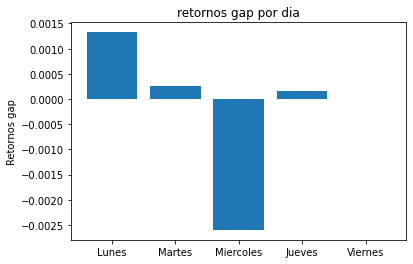

In [22]:
fig, ax = plt.subplots()
ax.set_ylabel('Retornos gap')
ax.set_title('retornos gap por dia')
plt.bar(dias, retornos)
plt.savefig('barras_simple.png')
plt.show()

RTA: El mejor dia para invertir es el jueves si se tiene en cuenta el retorno gap

EJERCICIO 2:mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios

In [10]:
retornos_intra = np.log(a['Close']/a['Open']).fillna(0)
retornos_intra

Day of Week
Friday       0.000163
Monday      -0.000150
Thursday     0.000607
Tuesday     -0.000009
Wednesday    0.000187
dtype: float64

In [11]:
dias1 = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
retornos1 = [retornos_intra["Monday"], retornos_intra["Tuesday"], retornos_intra["Wednesday"],retornos_intra["Thursday"], retornos_intra["Friday"]]

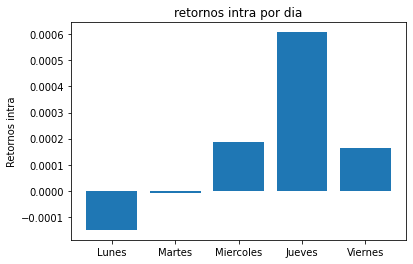

In [12]:
fig, ax = plt.subplots()
ax.set_ylabel('Retornos intra')
ax.set_title('retornos intra por dia')
plt.bar(dias1, retornos1)
plt.savefig('barras_simple.png')
plt.show()

RTA: El mejor dia para invertir si se toma en cuenta el retorno intradiario es el jueves

EJERCICIO 3:las mejores industrias que pertenecen al SP500 en las cuales se puede invertir

In [13]:
industrias=pd.read_csv("S&P500-Info.csv")
lista_ind=industrias["GICS Sector"].value_counts()

In [16]:
lista_ind

Information Technology    74
Industrials               73
Financials                66
Health Care               64
Consumer Discretionary    58
Consumer Staples          33
Real Estate               31
Utilities                 29
Materials                 28
Communication Services    26
Energy                    21
Name: GICS Sector, dtype: int64

In [14]:
industrias

,Unnamed: 0,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...,...
498,498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


<AxesSubplot:xlabel='count', ylabel='GICS Sector'>

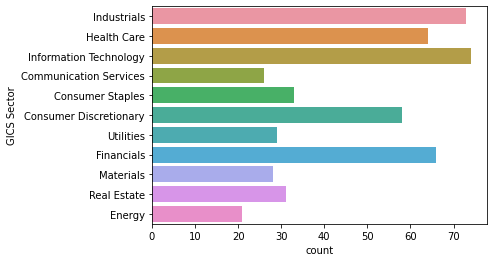

In [15]:
sns.countplot(y="GICS Sector",data=industrias,orient="h")


RTA: Las mejores industrias para invertir son las de tecnologia, las industriales y las de finanzas principalmente basandose en que son de las que más hay en el S&P500, ademas que en los ultimos años y en conjunto con la pandemia la industria tecnologica crecio exponencialmente

EJERCICIO 4:los momentos de alta volatilidad que afectaron al SP500

In [7]:
import datapackage
data_url = 'https://datahub.io/core/finance-vix/datapackage.json'
package = datapackage.Package(data_url)
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

In [8]:
data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4194,2020-08-31,23.91,26.50,21.77,26.41
4195,2020-09-01,25.86,26.59,25.02,26.12
4196,2020-09-02,26.01,27.07,25.53,26.57
4197,2020-09-03,26.28,35.94,25.66,33.60


In [13]:
volatilidad=(data.sort_values(by=('VIX High'),ascending= False))

RTA: Las 10 fechas con mas volatilidad

In [14]:
volatilidad["Date"].head(10)

1212    2008-10-24
4079    2020-03-18
4078    2020-03-17
4080    2020-03-19
4077    2020-03-16
1213    2008-10-27
1231    2008-11-20
1206    2008-10-16
1232    2008-11-21
1211    2008-10-23
Name: Date, dtype: object

In [15]:
volatilidad['Date'] = pd.DatetimeIndex(volatidad['Date'])

<AxesSubplot:xlabel='Date', ylabel='VIX High'>

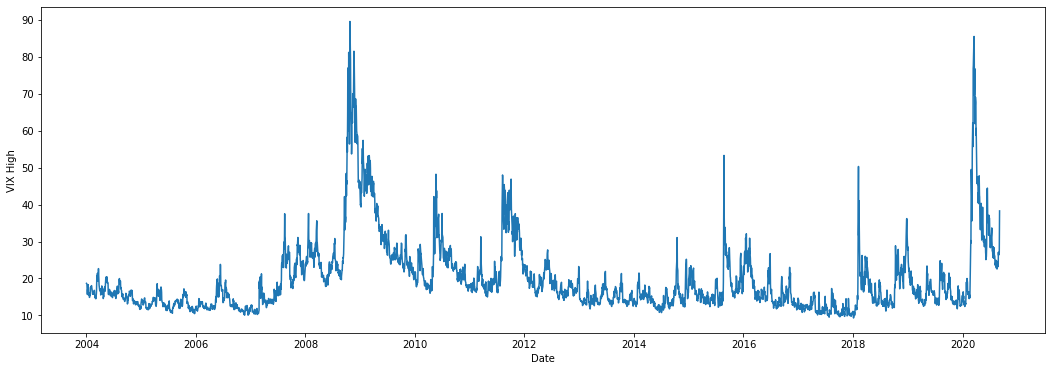

In [40]:
plt.figure(figsize=(18,6))
x=sns.lineplot(x="Date",y="VIX High",data=volatilidad)
x